In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.375.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.704.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.8597.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5740.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5703.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7717.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2618.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.1956.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5608.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5646.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7267.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.5341.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.7792.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.2888.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.3808.jpg
/kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs/dog.838

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

2024-05-29 05:13:08.989229: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 05:13:08.989354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 05:13:09.115751: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


# **Normalize**

In [4]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(32,32),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))  
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(32,32),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))  
model.add(BatchNormalization())          
model.add(Conv2D(32,kernel_size=(32,32),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))  
model.add(BatchNormalization())          
model.add(Flatten())   

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu')) 
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))          

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 225, 225, 32)   │        98,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 81, 81, 32)     │     1,048,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 40, 40, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 32)       │     1,048,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,278,241 (8.69 MB)

 Trainable params: 2,278,049 (8.69 MB)

 Non-trainable params: 192 (768.00 B)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [8]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


2024-05-29 05:14:01.775985: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng11{k2=1,k3=0} for conv (f32[32,32,225,225]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,256,256]{3,2,1,0}, f32[32,3,32,32]{3,2,1,0}, f32[32]{0}), window={size=32x32}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-29 05:14:02.337908: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.562026636s
Trying algorithm eng11{k2=1,k3=0} for conv (f32[32,32,225,225]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,256,256]{3,2,1,0}, f32[32,3,32,32]{3,2,1,0}, f32[32]{0}), window={size=32x32}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.5596 - loss: 0.7150

W0000 00:00:1716959952.763714      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
2024-05-29 05:19:43.468485: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng13{} for conv (f32[8,32,81,81]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,112,112]{3,2,1,0}, f32[32,32,32,32]{3,2,1,0}, f32[32]{0}), window={size=32x32}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-29 05:19:43.712515: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.244150631s
Trying algorithm eng13{} for conv (f32[8,32,81,81]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,112,112]{3,2,1,0}, f32[32,32,32,32]{3,2,1,0}, f32[32]{0}), window={size=32x32}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_res

625/625 ━━━━━━━━━━━━━━━━━━━━ 357s 347ms/step - accuracy: 0.5596 - loss: 0.7150 - val_accuracy: 0.5168 - val_loss: 0.7593
Epoch 2/10


W0000 00:00:1716959991.757531      96 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 321ms/step - accuracy: 0.6219 - loss: 0.6532 - val_accuracy: 0.5014 - val_loss: 0.8642
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 319ms/step - accuracy: 0.6667 - loss: 0.6097 - val_accuracy: 0.6778 - val_loss: 0.6042
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 319ms/step - accuracy: 0.7073 - loss: 0.5675 - val_accuracy: 0.6394 - val_loss: 0.6321
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 319ms/step - accuracy: 0.7322 - loss: 0.5339 - val_accuracy: 0.7142 - val_loss: 0.5508
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 319ms/step - accuracy: 0.7577 - loss: 0.5022 - val_accuracy: 0.7188 - val_loss: 0.5458
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 319ms/step - accuracy: 0.7704 - loss: 0.4762 - val_accuracy: 0.7458 - val_loss: 0.5217
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 319ms/step - accuracy: 0.7975 - loss: 0.4359 - val_accuracy: 0.6780 - val_loss: 0.6292
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 319ms/step - accuracy: 0.8232 - loss: 0.39

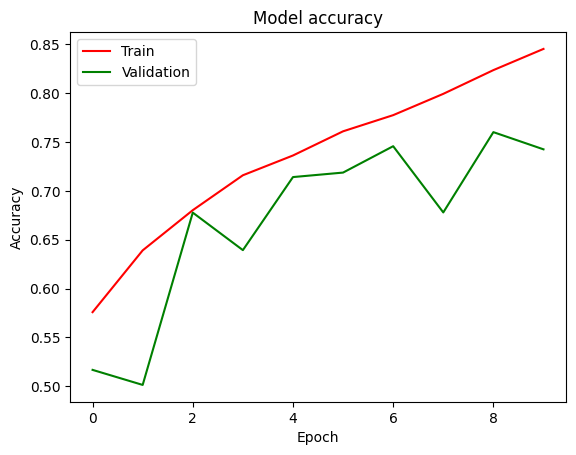

In [9]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], color='red', label='Train')
plt.plot(history.history['val_accuracy'], color='green', label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


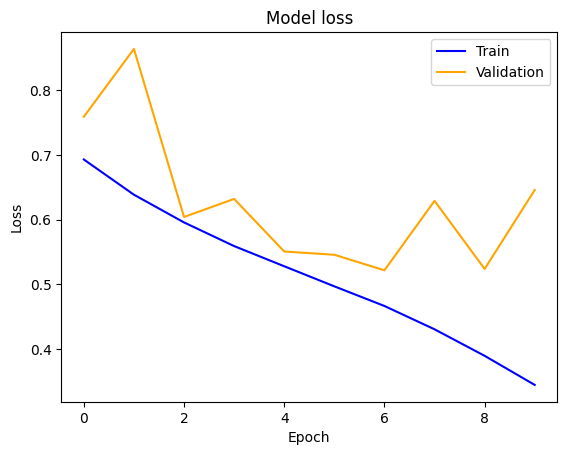

In [10]:

plt.plot(history.history['loss'], color='blue', label='Train')
plt.plot(history.history['val_loss'], color='orange', label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
import cv2
test_img = cv2.imread('/kaggle/input/dogs-vs-cats/train/cats/cat.2307.jpg')

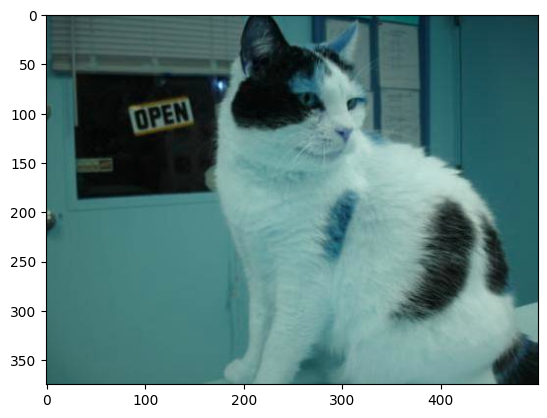

In [12]:
plt.imshow(test_img)

In [13]:
test_img.shape

(375, 499, 3)

In [14]:
test_img = cv2.resize(test_img,(256,256))

In [15]:
test_input = test_img.reshape((1,256,256,3))

In [16]:
model.predict(test_input)

2024-05-29 05:53:49.551415: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng13{} for conv (f32[1,32,225,225]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,256,256]{3,2,1,0}, f32[32,3,32,32]{3,2,1,0}, f32[32]{0}), window={size=32x32}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-29 05:53:50.192186: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.640878883s
Trying algorithm eng13{} for conv (f32[1,32,225,225]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,256,256]{3,2,1,0}, f32[32,3,32,32]{3,2,1,0}, f32[32]{0}), window={size=32x32}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-29 05:53:51.517

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


array([[0.]], dtype=float32)

In [17]:
model.save('catVSdog_model.h5')